<p style="font-family: Arial; font-size:3.75em;color:black; font-style:bold"><br>
Modelo Var - CVaR Entregable</p><br>

En este documento se desarrollara el paso a paso y las modificaciones necesarias para determinar el VaR y el CVaR de portafolio.

Modelo: Var Parametrico Varianza - Covarianza

**disclaimer: este procedimiento es un ejercicio de carácter analítico con el único fin de mostrar el procedimiento de un VaR CVaR de un portafolio determinado, con el fin de cumplir una prueba practica**

<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Importar Librerias
</p>

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as pl
import math
from statistics import quantiles

import warnings
warnings.filterwarnings('ignore')

<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Importar informacion, se encuentra en excel:
</p>

In [147]:
Var_Instru = pd.read_excel(r'C:\Users\jmrojas\Desktop\Entregable\Documentos Base\Ejercicio_VaR_Portafolio.xlsx',sheet_name= 'Datos_Instrumento')
Portafolio = pd.read_excel(r'C:\Users\jmrojas\Desktop\Entregable\Documentos Base\Portafolio.xlsx',sheet_name= 'Hoja1')

<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Informacion sobre precios - historico:
</p>

In [148]:
Var_Instru.tail(10)

,Fecha,HCOLSEL CB Equity,NUTRESA CB Equity,PFAVAL CB Equity,ECOPETL CB Equity,COP TRM Curncy,TES COP 10% 24/7/24
2213,2022-01-22,14269.0,33600.0,1111.0,2851.0,3964.30,0.031272
2214,2022-01-23,14269.0,33600.0,1111.0,2851.0,3964.30,0.031272
2215,2022-01-24,14177.5,33600.0,1105.0,2824.0,3977.51,0.031398
2216,2022-01-25,14248.0,33600.0,1100.0,2895.0,3987.32,0.031116
2217,2022-01-26,14259.0,33600.0,1115.0,2891.0,3947.83,0.031243
2218,2022-01-27,14279.5,33600.0,1113.0,2905.0,3944.04,0.031865
2219,2022-01-28,14412.0,33600.0,1110.0,2886.0,3982.60,0.032662
2220,2022-01-29,14412.0,33600.0,1110.0,2886.0,3982.60,0.032662
2221,2022-01-30,14412.0,33600.0,1110.0,2886.0,3982.60,0.032662
2222,2022-01-31,14350.0,33600.0,1127.0,2905.0,3942.73,0.033499


<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Se valida informacion Blank or Null:
</p>

In [149]:
Var_Instru.isnull().any()

Fecha                                  False
HCOLSEL CB Equity                       True
NUTRESA CB Equity                       True
PFAVAL CB Equity                        True
ECOPETL CB Equity                       True
COP TRM Curncy                          True
TES COP  10%  24/7/24                   True
dtype: bool

<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Se elimina informacion Blank or Null:
</p>

Se valida cual es la fecha minima de la cual se encuentra infomracion para los 6 instrumentos.

Posteriormente se filtra la tabla obteniendo informacion historica para los 6 instrumentos que componen el portafolio.

In [150]:
Var_Instru = Var_Instru.dropna()
min(Var_Instru['Fecha'])

Timestamp('2018-01-01 00:00:00')

In [151]:
Fecha_Inicio = min(Var_Instru['Fecha'])
Fecha_Fin = max(Var_Instru['Fecha'])

print('Tenemos información desde ', Fecha_Inicio, ' hasta ' , Fecha_Fin )

Tenemos información desde  2018-01-01 00:00:00  hasta  2022-01-31 00:00:00


In [152]:
Var_Instru2 = Var_Instru.loc[Var_Instru.Fecha.between(Fecha_Inicio,Fecha_Fin)]

In [153]:
Var_Instru2.head(10)

,Fecha,HCOLSEL CB Equity,NUTRESA CB Equity,PFAVAL CB Equity,ECOPETL CB Equity,COP TRM Curncy,TES COP 10% 24/7/24
731,2018-01-01,13710.0,27820.0,1290.0,2210.0,2984.00,0.041412
732,2018-01-02,13710.0,27360.0,1290.0,2260.0,2940.94,0.041503
733,2018-01-03,14035.0,27300.0,1275.0,2350.0,2908.68,0.041681
734,2018-01-04,14181.5,27300.0,1300.0,2460.0,2885.76,0.041796
735,2018-01-05,14285.0,27240.0,1325.0,2500.0,2898.32,0.041888
736,2018-01-06,14285.0,27240.0,1325.0,2500.0,2898.32,0.041888
737,2018-01-07,14285.0,27240.0,1325.0,2500.0,2898.32,0.041888
738,2018-01-08,14285.0,27240.0,1325.0,2500.0,2898.32,0.041888
739,2018-01-09,14335.0,27100.0,1290.0,2555.0,2914.37,0.041782
740,2018-01-10,14415.0,27240.0,1275.0,2535.0,2895.69,0.041820


In [154]:
Var_Instru2.set_index('Fecha',inplace = True)

<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Rendimientos y Covarianza:
</p>

-Se calculan los rendimientos para los instrumentos.

-Se calcula la matriz de Covarianza y se grafica

-Es necesario resaltar que en el grafico se escala *10000 para vizualizar la covarianza graficamente

-Se calculan los promedios de los rendimientos

In [155]:
Rendimientos = Var_Instru2.pct_change() 

In [156]:
Rendimientos.head(10)

,HCOLSEL CB Equity,NUTRESA CB Equity,PFAVAL CB Equity,ECOPETL CB Equity,COP TRM Curncy,TES COP 10% 24/7/24
Fecha,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.000000,-0.016535,0.000000,0.022624,-0.014430,0.002208
2018-01-03,0.023705,-0.002193,-0.011628,0.039823,-0.010969,0.004288
2018-01-04,0.010438,0.000000,0.019608,0.046809,-0.007880,0.002756
2018-01-05,0.007298,-0.002198,0.019231,0.016260,0.004352,0.002196
2018-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-09,0.003500,-0.005140,-0.026415,0.022000,0.005538,-0.002531


In [157]:
Matriz_Cov = Rendimientos.cov()
Matriz_Cov

,HCOLSEL CB Equity,NUTRESA CB Equity,PFAVAL CB Equity,ECOPETL CB Equity,COP TRM Curncy,TES COP 10% 24/7/24
HCOLSEL CB Equity,0.000139,0.000082,0.000119,0.000159,-0.000028,-0.000015
NUTRESA CB Equity,0.000082,0.000209,0.000069,0.000079,-0.000015,-0.000003
PFAVAL CB Equity,0.000119,0.000069,0.000231,0.000128,-0.000024,-0.000024
ECOPETL CB Equity,0.000159,0.000079,0.000128,0.000401,-0.000035,-0.000014
COP TRM Curncy,-0.000028,-0.000015,-0.000024,-0.000035,0.000041,0.000010
TES COP 10% 24/7/24,-0.000015,-0.000003,-0.000024,-0.000014,0.000010,0.000167


<AxesSubplot:>

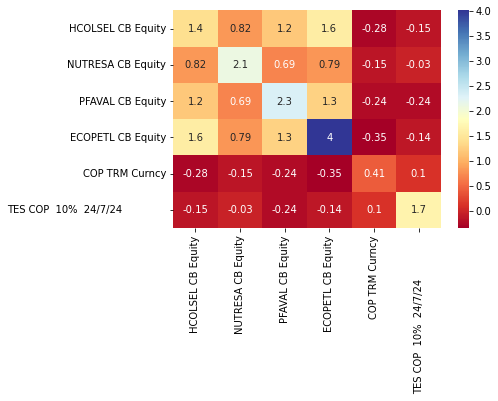

In [158]:
corr = Rendimientos.cov()*10000
sns.heatmap(corr, cmap="RdYlBu", annot=True)

In [207]:
Promedio_Rendimientos = Rendimientos.mean()
Promedio_Rendimientos = Promedio_Rendimientos.reset_index(level=0)
Promedio_Rendimientos.columns = ['Instrumento','Promedio']
Promedio_Rendimientos['Instrumento'][5] = 'TES'
Promedio_Rendimientos.head(6)

,Instrumento,Promedio
0,HCOLSEL CB Equity,0.000101
1,NUTRESA CB Equity,0.000226
2,PFAVAL CB Equity,0.000023
3,ECOPETL CB Equity,0.000386
4,COP TRM Curncy,0.000207
5,TES,-0.000058


Muestra alerta debido a que estamos sobreescribiendo la variable "TES"

In [160]:
CuantosDias = Rendimientos.count()[0]
CuantosDias

1491

<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Portafolio:
</p>

-Se tarea la compisicion de portafolio, para calcular la participacion, y continuar con el procedimeinto del modelo

-Se renombran los intrumentos en el portafolio de acuerdo a los nombres de la tabla precio, esto con el fin de que al realziar la union sea correspondiente cada instrumento con cada instrumento.

-Se relacionan la media del portafolio y el promedio del portafolio.

In [161]:
Portafolio.head()
Portafolio_New= Portafolio.rename(columns=Portafolio.iloc[0])
Portafolio_New.head(10)

,NaN,Instrumento,Posición Nominal,Valor Mercado (COP),Precio
0,NaN,Instrumento,Posición Nominal,Valor Mercado (COP),Precio
1,NaN,Acciones Ecopetrol,300000,871500000,2905
2,NaN,Acciones Nutresa,30000,1008000000,33600
3,NaN,Acciones PFAVAL,250000,281750000,1127
4,NaN,Acciones HCOLSEL,50000,717500000,14350
5,NaN,Dólares Amercianos (USD),500000,1971365000,3942.73
6,NaN,TES COP 10% 24/7/24,2500000000,2769100000,110.764


In [162]:
Portafolio_New2 = Portafolio_New.iloc[1:,1:]
Portafolio_New2.head(10)

,Instrumento,Posición Nominal,Valor Mercado (COP),Precio
1,Acciones Ecopetrol,300000,871500000,2905
2,Acciones Nutresa,30000,1008000000,33600
3,Acciones PFAVAL,250000,281750000,1127
4,Acciones HCOLSEL,50000,717500000,14350
5,Dólares Amercianos (USD),500000,1971365000,3942.73
6,TES COP 10% 24/7/24,2500000000,2769100000,110.764


In [163]:
Portafolio_New2['Participacion'] = Portafolio_New2['Valor Mercado (COP)']/sum(Portafolio_New2['Valor Mercado (COP)']) 
Portafolio_New2['Instrumento'] = ['ECOPETL CB Equity','NUTRESA CB Equity','PFAVAL CB Equity','HCOLSEL CB Equity','COP TRM Curncy','TES']
Portafolio_New2

,Instrumento,Posición Nominal,Valor Mercado (COP),Precio,Participacion
1,ECOPETL CB Equity,300000,871500000,2905,0.114382
2,NUTRESA CB Equity,30000,1008000000,33600,0.132297
3,PFAVAL CB Equity,250000,281750000,1127,0.036979
4,HCOLSEL CB Equity,50000,717500000,14350,0.09417
5,COP TRM Curncy,500000,1971365000,3942.73,0.258736
6,TES,2500000000,2769100000,110.764,0.363436


In [164]:
Cruce = Portafolio_New2.merge(Promedio_Rendimientos, on='Instrumento', how='inner')
Cruce.head(6)

,Instrumento,Posición Nominal,Valor Mercado (COP),Precio,Participacion,Promedio
0,ECOPETL CB Equity,300000,871500000,2905,0.114382,0.000386
1,NUTRESA CB Equity,30000,1008000000,33600,0.132297,0.000226
2,PFAVAL CB Equity,250000,281750000,1127,0.036979,0.000023
3,HCOLSEL CB Equity,50000,717500000,14350,0.09417,0.000101
4,COP TRM Curncy,500000,1971365000,3942.73,0.258736,0.000207
5,TES,2500000000,2769100000,110.764,0.363436,-0.000058


In [165]:
Cruce['Media Portafolio'] = Cruce['Participacion']*Cruce['Promedio']
lst= [3,1,2,0,4,5]
Cruce = Cruce.loc[lst]
Cruce

,Instrumento,Posición Nominal,Valor Mercado (COP),Precio,Participacion,Promedio,Media Portafolio
3,HCOLSEL CB Equity,50000,717500000,14350,0.09417,0.000101,0.000009
1,NUTRESA CB Equity,30000,1008000000,33600,0.132297,0.000226,0.00003
2,PFAVAL CB Equity,250000,281750000,1127,0.036979,0.000023,0.000001
0,ECOPETL CB Equity,300000,871500000,2905,0.114382,0.000386,0.000044
4,COP TRM Curncy,500000,1971365000,3942.73,0.258736,0.000207,0.000054
5,TES,2500000000,2769100000,110.764,0.363436,-0.000058,-0.000021


<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Conversion de variables a libre Numpy para realizar los calculos:
</p>

-Se calculan la Desviacion Estandar con multiplicacion de matrices

In [166]:
Media_PortafolioNew = Cruce['Media Portafolio'].to_numpy()
Parti_PortafolioNew = Cruce['Participacion'].to_numpy()
Promed_PortafolioNew = Cruce['Promedio'].to_numpy()
Valor_Mercado_PortafolioNew = Cruce['Valor Mercado (COP)'].to_numpy()

Matriz_CovNew = Matriz_Cov.to_numpy()

In [167]:
DSV_Portafolio = np.sqrt(Parti_PortafolioNew.T @ (Matriz_CovNew @ Parti_PortafolioNew))
DSV_Portafolio*100

0.6279759567446852

In [168]:
x = np.arange(-0.05,0.055,0.001)

In [169]:
Suma_Media_Portafolio = sum(Media_PortafolioNew)
Suma_Media_Portafolio

0.00011692951771443552

<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Validacion de Distribucion Normal de los datos:
</p>


In [170]:
Distribucion_Normal = norm.pdf(x,Suma_Media_Portafolio,DSV_Portafolio)
Distribucion_Normal

array([9.38618100e-13, 3.30301776e-12, 1.13323526e-11, 3.79067400e-11,
       1.23623200e-10, 3.93070735e-10, 1.21850868e-09, 3.68276266e-09,
       1.08519060e-08, 3.11763666e-08, 8.73237068e-08, 2.38465751e-07,
       6.34902519e-07, 1.64806856e-06, 4.17090871e-06, 1.02913721e-05,
       2.47572878e-05, 5.80657494e-05, 1.32777410e-04, 2.96016238e-04,
       6.43419273e-04, 1.36351457e-03, 2.81716761e-03, 5.67482896e-03,
       1.11449995e-02, 2.13400050e-02, 3.98378752e-02, 7.25078460e-02,
       1.28665178e-01, 2.22599527e-01, 3.75469473e-01, 6.17464817e-01,
       9.90004086e-01, 1.54756516e+00, 2.35856629e+00, 3.50456740e+00,
       5.07700900e+00, 7.17081695e+00, 9.87453211e+00, 1.32571937e+01,
       1.73529720e+01, 2.21453891e+01, 2.75537017e+01, 3.34244120e+01,
       3.95307255e+01, 4.55819585e+01, 5.12434504e+01, 5.61656687e+01,
       6.00192675e+01, 6.25313253e+01, 6.35172612e+01, 6.29032493e+01,
       6.07353561e+01, 5.71738281e+01, 5.24735139e+01, 4.69537422e+01,
      

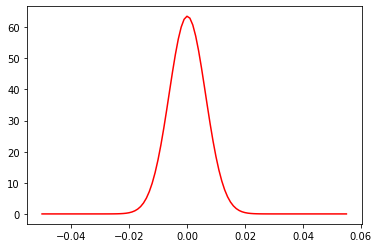

In [171]:
pl.plot (x,Distribucion_Normal, color = 'r')
pl.show()

<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Calculo del VaR y CVaR y Rentabilidad:
</p>

Intervalo de confianza del 5%

- Se calculo 1 Dia

- Se calculo 7 Dias

Se estima rentabilidad minima y maxima del portafolio con una intervalo de confianza 5%

In [172]:
Nivel_Confianza = 0.05

VaR = norm.ppf(Nivel_Confianza,Suma_Media_Portafolio,DSV_Portafolio)
VaR

-0.01021235578318373

In [173]:
No_Dias = 7
VaR * np.sqrt(No_Dias)

-0.02701935370241641

In [174]:
Rendimientos_Min = Suma_Media_Portafolio - 2* DSV_Portafolio / np.sqrt(CuantosDias)
Rendimientos_Max = Suma_Media_Portafolio + 2* DSV_Portafolio / np.sqrt(CuantosDias)

In [175]:
Rendimientos_Min*100

-0.020833312795082538

In [176]:
Rendimientos_Max*100

0.04421921633796964

In [177]:
CVaR = Suma_Media_Portafolio - (DSV_Portafolio/0.05)*math.exp(-0.5*((VaR-Suma_Media_Portafolio)**2)/((Parti_PortafolioNew.T @ (Matriz_CovNew @ Parti_PortafolioNew))*1))
CVaR

-0.03235228000002761

In [178]:
Valor_Mercado_Portafolio = sum(Valor_Mercado_PortafolioNew)
Valor_Mercado_Portafolio*VaR

-77810134.36857022

In [179]:
Valor_Mercado_Portafolio*CVaR

-246498977.06041035

Se procede a calcular el VaR Simulacion Historica

In [198]:
Rendimientos_1 = Rendimientos.drop("2018-01-01")
#Rendimientos_1 = Rendimientos.iloc[1:]
Rendimientos_1['Portafolio'] = np.dot(Rendimientos_1,np.transpose(Parti_PortafolioNew))
Rendimientos_1.head(15)



,HCOLSEL CB Equity,NUTRESA CB Equity,PFAVAL CB Equity,ECOPETL CB Equity,COP TRM Curncy,TES COP 10% 24/7/24,Portafolio
Fecha,,,,,,,
2018-01-02,0.000000,-0.016535,0.000000,0.022624,-0.014430,0.002208,-0.002531
2018-01-03,0.023705,-0.002193,-0.011628,0.039823,-0.010969,0.004288,0.004788
2018-01-04,0.010438,0.000000,0.019608,0.046809,-0.007880,0.002756,0.006025
2018-01-05,0.007298,-0.002198,0.019231,0.016260,0.004352,0.002196,0.004892
2018-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2018-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2018-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2018-01-09,0.003500,-0.005140,-0.026415,0.022000,0.005538,-0.002531,0.001702
2018-01-10,0.005581,0.005166,-0.011628,-0.007828,-0.006410,0.000928,-0.001437


In [204]:
VaR_Simulacion_Historia = np.percentile(Rendimientos_1['Portafolio'], 5)
VaR_Simulacion_Historia*100

-0.8275213829045031

<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Concluciones:
</p>

De acuerdo con el procedimiento anterior, usando el histórico de datos desde el 01/01/2018 hasta 31/01/2022 para los 6 instrumentos del portafolio, con los resultados obtenidos en este proceso se puede concluir lo siguiente:

-	Se evidencia una concentración relevante en el emisor Ministerio de Hacienda (TES COP 10% 24) del 36,3% del total del portafolio, 
-	Seguido de la posición en moneda extranjera (USD) con una participación del 25,9%, 
-	Ahora bien, los emisores restantes que corresponden a 4 acciones y 1 ETF tienen una participación promedio de 9,4% por instrumento, sin embargo, si se valora como una posición en el mercado de renta variable (RV) como un conjunto, este portafolio tiene una concentración relevante del 37,8%.

Sobre la metodología de Var Paramétrico (Intervalo de Confianza del 95%) se obtiene lo siguiente:
-	Rendimientos medios del portafolio de: 0,0117%
-	Varianza del portafolio de: 0,0039%
-	Desviación (Volatilidad): 0,63%
-	Rendimientos Min esperados: -0,0208%
-	Rendimientos Max esperados: 0,0442%
-	VaR (1 dia): -1,01%
-	VaR Simulación Histórica: -0,8275% 
-	VaR (7 dia): - 2,70%
-	CVaR (1 dia): -3,23%
-	CVaR Simulación Histórica: -1,5%

El impacto probable en el portafolio con los datos mencionados en este modelo es de:
-	VaR (1 dia): 77,788.548 millones
-	VaR (7 dia): 205,447.561 millones

Ahora bien, sobre el CVaR estimado 1 día, se concluye que las perdidas que extricamente ajustadas superan al VaR que seria de 3,23% del Portafolio.
-	CVaR (1 dia): 246,429.841 millones

Frente a los riesgos de portafolio, se resalta el riesgo de concentración en un solo emisor como se mencionó anteriormente, tomando relevancia la situación macroeconomía actual frente a Tasas de Interés e Inflación, en materia global y local.

Sin embargo y teniendo en cuenta que el Banco pertenece al programa de creadores de mercado, y que dicho título puede estar dentro de las inversiones obligatorias, el riesgo se trasladaría a la posición que tengo en moneda extranjera frente a la volatilidad que presenta esta activo ya sea por la coyuntura global (Tasas de la FED e inflación) y riesgo político interno en Colombia, sobre el mercado RV tengo 4 emisores y uno de ellos es una canasta diversificada del mismo mercado (ETF), son emisores que presentan volúmenes relevantes de negociación en el mercado de RV se presentaron resultados sobresaliente para el cierre del ejercicio del 2021 valorizando el precio objetivo de cada emisor:

Eventos: Ecopetrol - Resultados del cierre del ejercicio extraordinarios, Yield 8,72%, precio Brent sobre los $100 USD PFAval - Escisión sobre su posición en Centroamérica Holding BHI, dicha escisión genero valor por un 10% aprox, emisión de acciones como dividendo. Nutresa - En curso 3 OPA, YTD del 61,28%.

Aqui se da por finalizado el procedimeitno y analisis.

Gracias.



